In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import make_pipeline


### Task1


https://zhuanlan.zhihu.com/p/90073632  
https://bourneli.github.io/linear-algebra/calculus/2016/04/30/linear-algebra-12-linear-regression-matrix-calulation.html

In [69]:
def poly_fit(x, y, n):
    x = np.array(x)
    y = np.array(y)
    A = np.vander(x, n + 1, increasing=True)
    coeffs = np.linalg.lstsq(A, y, rcond=None)[0]
    Y = np.polyval(coeffs[::-1], x)
    return Y

### Task 2

In [87]:
def weighted_polynomial_least_squares_fit(x, y, n, weight_func):
    x = np.array(x)
    y = np.array(y)
    w = weight_func(x)
    A = np.vander(x, n + 1, increasing=True)
    Aw = A * np.sqrt(w[:, np.newaxis])  # square root of w
    coeffs = np.linalg.lstsq(Aw, np.sqrt(w) * y, rcond=None)[0]
    return coeffs

def weight_func_1(t):
    return 1 - t**2

def weight_func_2(t):
    return t + 1

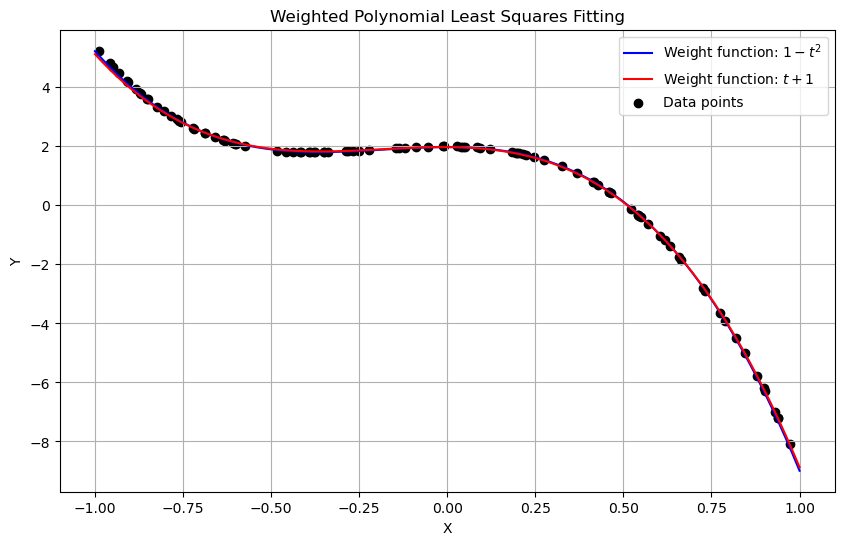

In [231]:
np.random.seed(42)
x = np.sort(np.random.uniform(-1, 1, 100))
y = 0.5 * x**4 - 7.1 * x**3 - 4.2 * x**2 + 2

degree = 3
coefficients_1 = weighted_polynomial_least_squares_fit(x, y, degree, weight_func_1)
coefficients_2 = weighted_polynomial_least_squares_fit(x, y, degree, weight_func_2)

x_values = np.linspace(-1, 1, 100)
y_values_1 = np.polyval(coefficients_1[::-1], x_values)
y_values_2 = np.polyval(coefficients_2[::-1], x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values_1, label='Weight function: $1 - t^2$', color='blue')
plt.plot(x_values, y_values_2, label='Weight function: $t + 1$', color='red')
plt.scatter(x, y, color='black', label='Data points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Weighted Polynomial Least Squares Fitting')
plt.legend()
plt.grid(True)
plt.show()


### Task 3

In [71]:
def lineplot(x, y, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y, **kwargs)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.grid(True)

In [149]:
X = np.sort(np.random.uniform(0, 4, 100))
y = 0.5 * X**4 - 7.1 * X**3 - 4.2 * X**2 + 2

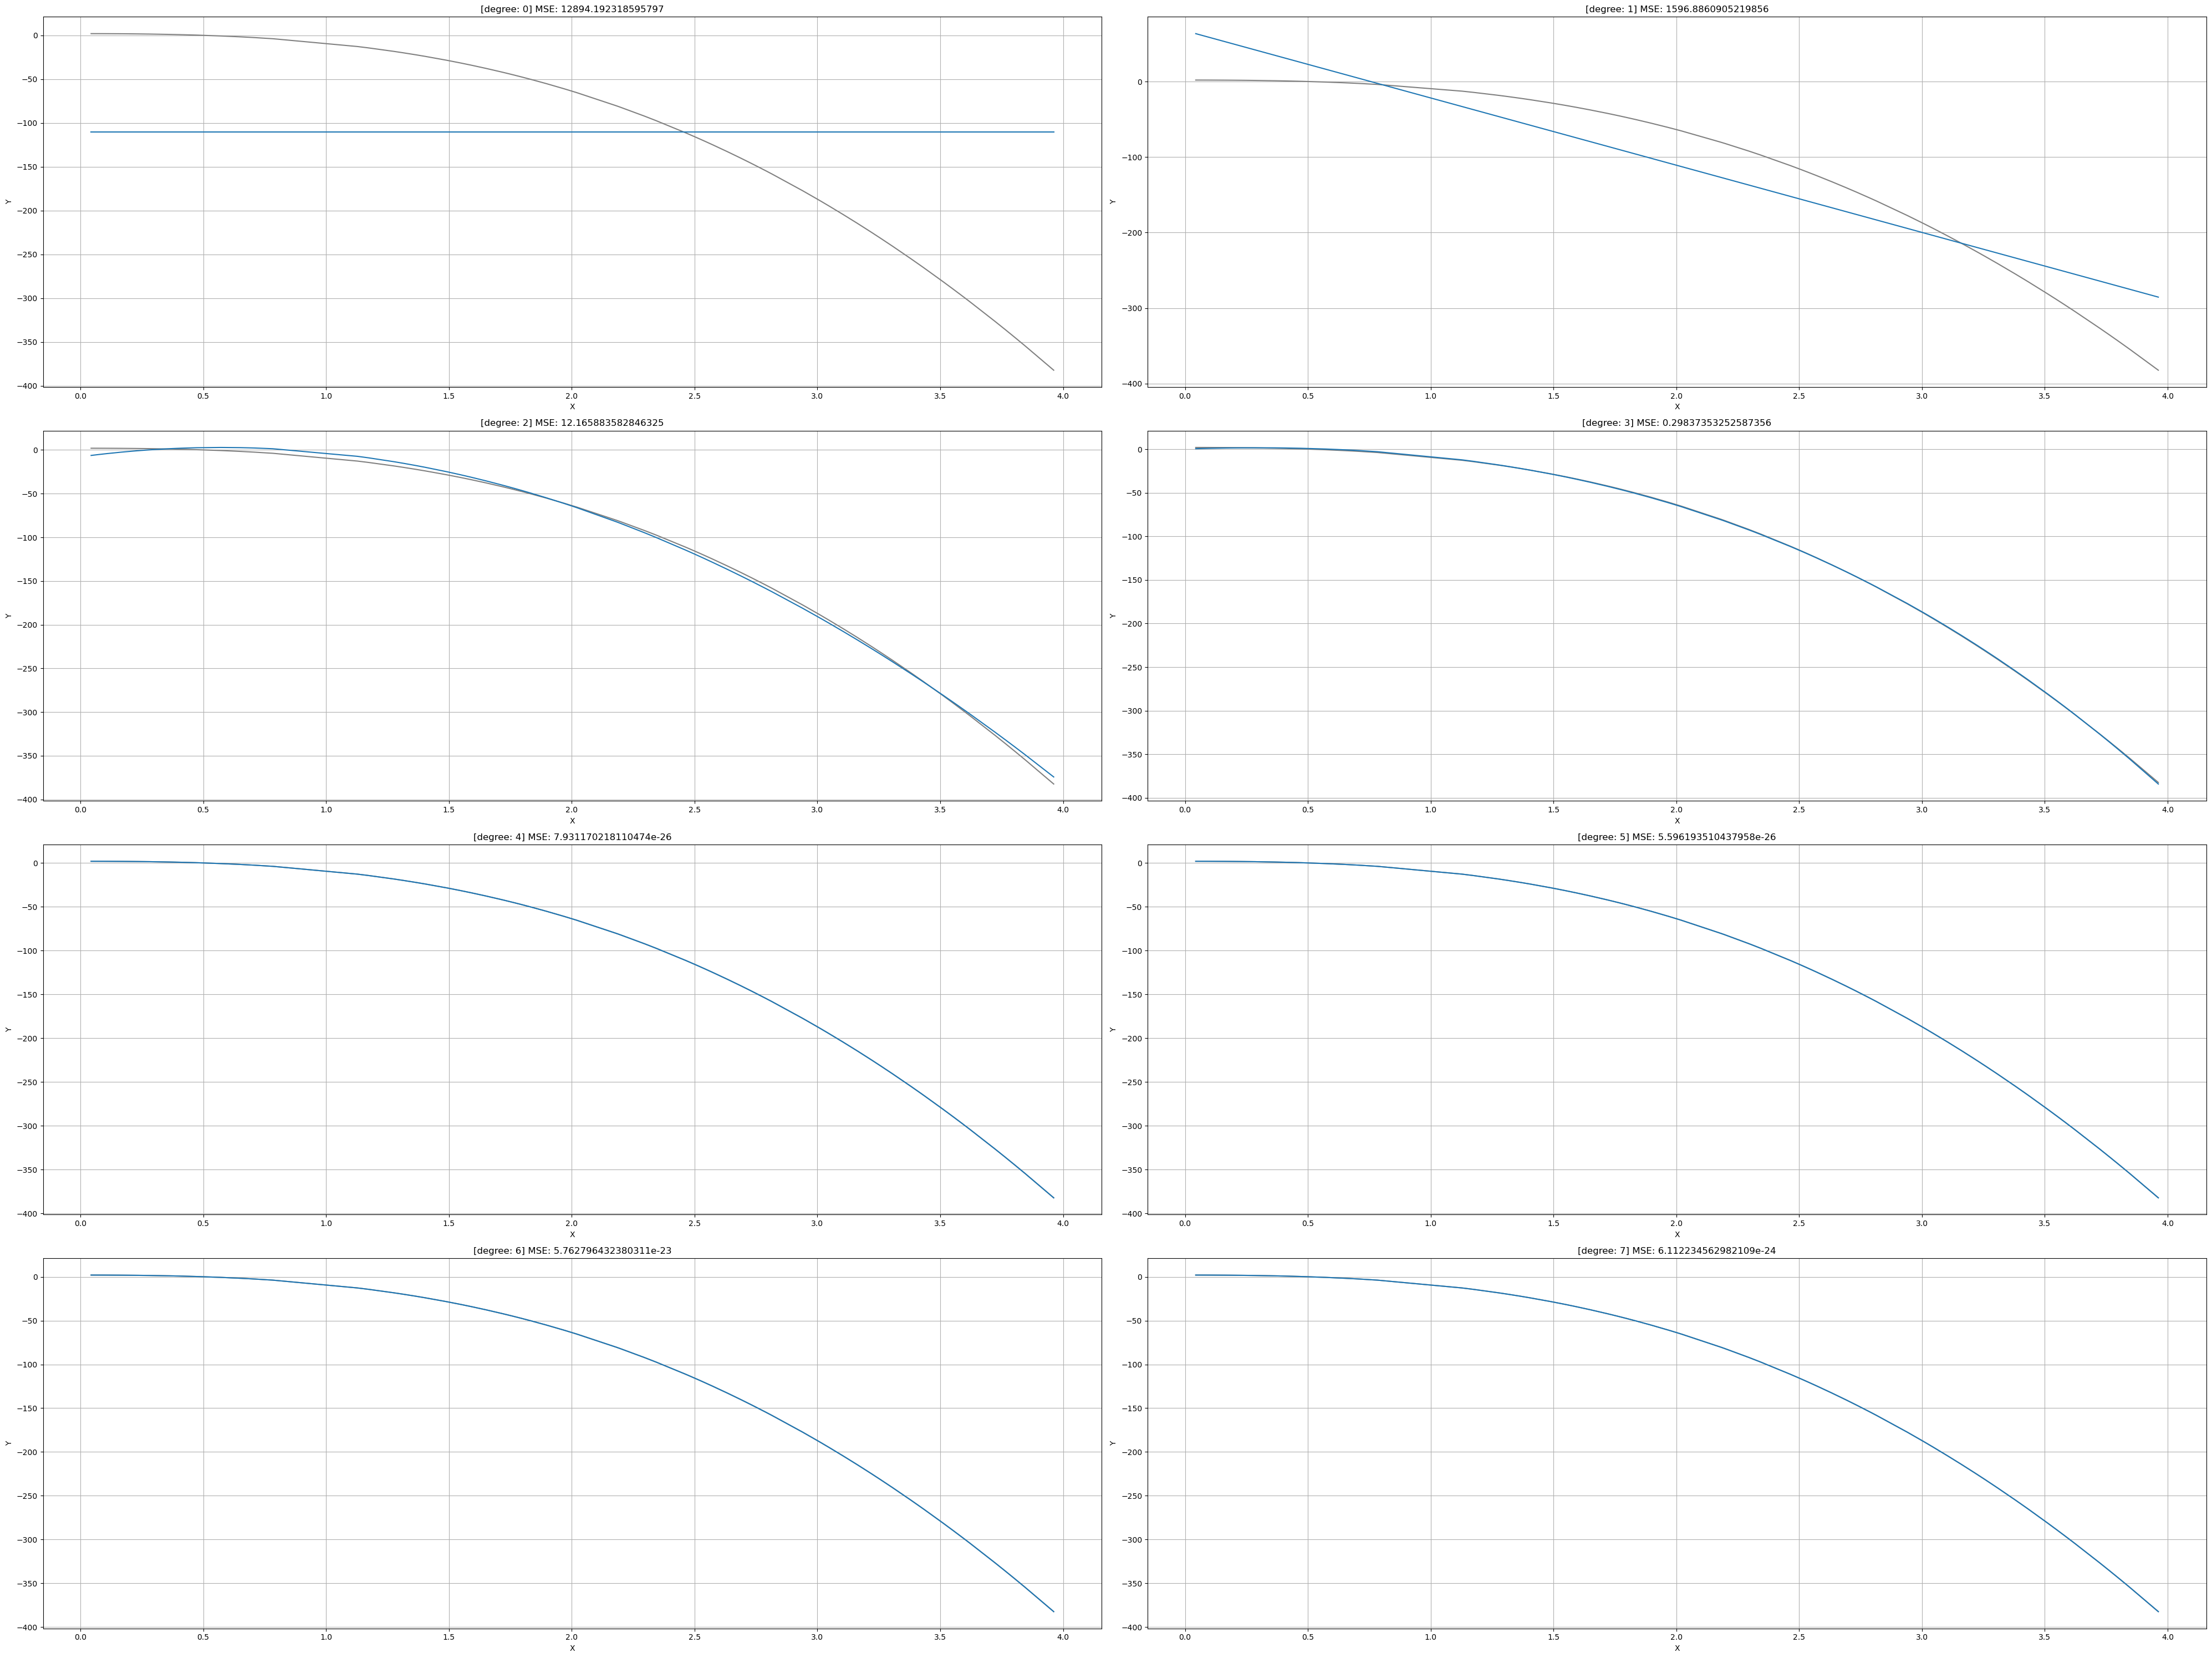

In [151]:
fig, axs = plt.subplots(4, 2, figsize=(40, 30))
for i, ax in enumerate(axs.ravel()):
    Y = poly_fit(X, y, i)
    mse = np.mean((Y - y) ** 2)
    ax.set_title(f"[degree: {i}] MSE: {mse}")
    lineplot(X, y, color="grey", ax=ax)
    lineplot(X, Y, ax=ax)

plt.tight_layout()
plt.show()


### Task 4

In [74]:
np.random.seed(42)
x = np.sort(np.random.uniform(0, 4, 100))
u = np.random.normal(0, 1, 100)
y = 0.5 * x**4 - 7.1 * x**3 - 4.2 * x**2 + 2 + u

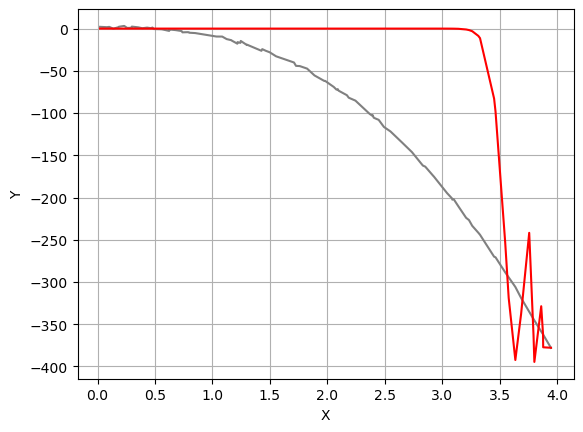

In [76]:
Y = poly_fit(x, y, 99)
lineplot(x,y,color='grey')
lineplot(x,Y,color='red')

/Users/clarkhu/opt/anaconda3/envs/dl/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.827e+02, tolerance: 1.285e+02
  model = cd_fast.enet_coordinate_descent(
/Users/clarkhu/opt/anaconda3/envs/dl/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.038e+03, tolerance: 1.285e+02
  model = cd_fast.enet_coordinate_descent(
/Users/clarkhu/opt/anaconda3/envs/dl/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

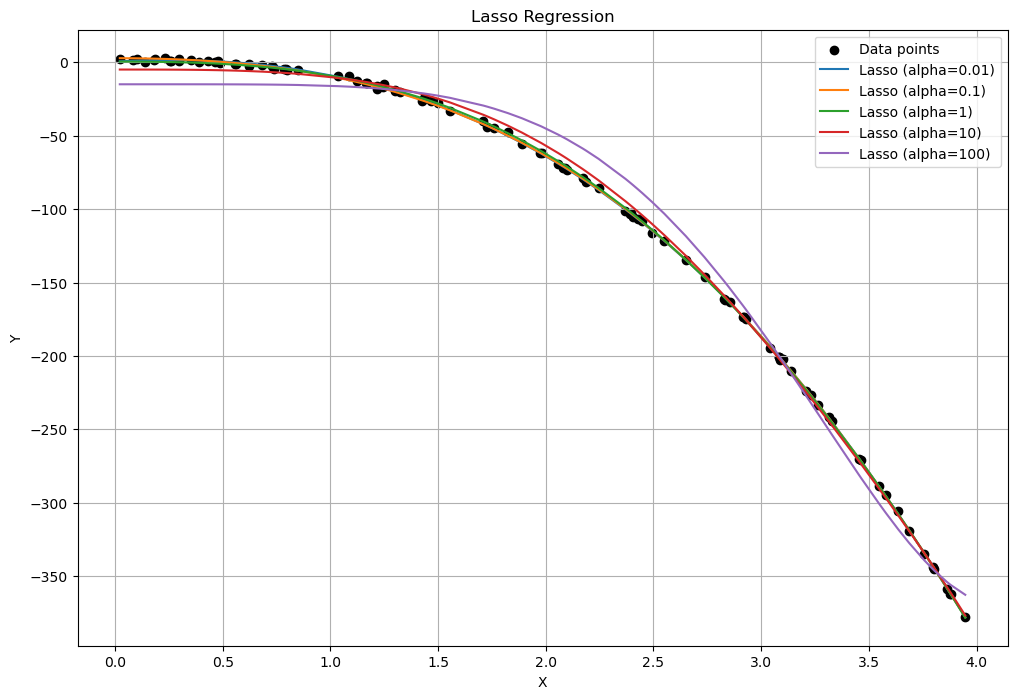

In [86]:
x = x.reshape(-1, 1)
degree = 10
alphas = [0.01, 0.1, 1, 10, 100]

lasso_predictions = []
ridge_predictions = []

for alpha in alphas:
    lasso_model = make_pipeline(PolynomialFeatures(degree=degree), Lasso(alpha=alpha))
    lasso_model.fit(x, y)
    lasso_predictions.append(lasso_model.predict(x))
plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='black', label='Data points')
for i, alpha in enumerate(alphas):
    plt.plot(x, lasso_predictions[i], label=f'Lasso (alpha={alpha})')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Lasso Regression')
plt.legend()
plt.grid(True)
plt.show()


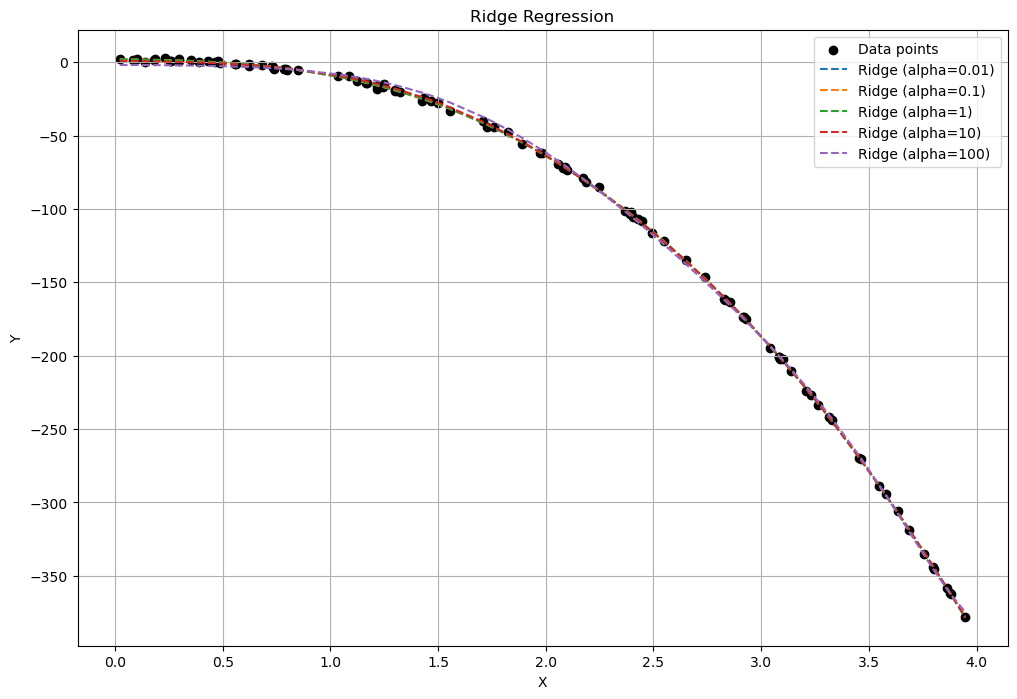

In [85]:
for alpha in alphas:
    ridge_model = make_pipeline(PolynomialFeatures(degree=degree), Ridge(alpha=alpha))
    ridge_model.fit(x, y)
    ridge_predictions.append(ridge_model.predict(x))
plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='black', label='Data points')
for i, alpha in enumerate(alphas):
    plt.plot(x, ridge_predictions[i], label=f'Ridge (alpha={alpha})', linestyle='--')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()

### Task 5

In [215]:
connections = [
    ('Białystok', 'Warszawa', 198),
    ('Gdańsk', 'Warszawa', 415),
    ('Łódź', 'Warszawa', 136),
    ('Poznań', 'Warszawa', 310),
    ('Poznań', 'Szczecin', 241),
    ('Szczecin', 'Świnoujście', 110),
    ('Poznań', 'Wrocław', 183),
    ('Opole', 'Wrocław', 98),
    ('Katowice', 'Opole', 113),
    ('Katowice', 'Kraków', 83),
    ('Kraków', 'Rzeszów', 166),
    ('Katowice', 'Warszawa', 297),
    ('Katowice', 'Sosnowiec', 10)
]

city_members = {
    'Białystok': 12,
    'Gdańsk': 35,
    'Katowice': 53,
    'Kraków': 67,
    'Łódź': 41,
    'Opole': 11,
    'Poznań': 29,
    'Rzeszów': 16,
    'Sosnowiec': 7,
    'Szczecin': 23,
    'Świnoujście': 9,
    'Warszawa': 102,
    'Wrocław': 52
}


In [225]:
G = nx.DiGraph()

for connection in connections:
    source, target, distance = connection
    G.add_edge(source, target, weight=distance)
    G.add_edge(target, source, weight=distance)

shortest_paths = dict(nx.all_pairs_dijkstra_path_length(G))

In [229]:
shortest_paths

{'Białystok': {'Białystok': 0,
  'Warszawa': 198,
  'Łódź': 334,
  'Katowice': 495,
  'Sosnowiec': 505,
  'Poznań': 508,
  'Kraków': 578,
  'Opole': 608,
  'Gdańsk': 613,
  'Wrocław': 691,
  'Rzeszów': 744,
  'Szczecin': 749,
  'Świnoujście': 859},
 'Warszawa': {'Warszawa': 0,
  'Łódź': 136,
  'Białystok': 198,
  'Katowice': 297,
  'Sosnowiec': 307,
  'Poznań': 310,
  'Kraków': 380,
  'Opole': 410,
  'Gdańsk': 415,
  'Wrocław': 493,
  'Rzeszów': 546,
  'Szczecin': 551,
  'Świnoujście': 661},
 'Gdańsk': {'Gdańsk': 0,
  'Warszawa': 415,
  'Łódź': 551,
  'Białystok': 613,
  'Katowice': 712,
  'Sosnowiec': 722,
  'Poznań': 725,
  'Kraków': 795,
  'Opole': 825,
  'Wrocław': 908,
  'Rzeszów': 961,
  'Szczecin': 966,
  'Świnoujście': 1076},
 'Łódź': {'Łódź': 0,
  'Warszawa': 136,
  'Białystok': 334,
  'Katowice': 433,
  'Sosnowiec': 443,
  'Poznań': 446,
  'Kraków': 516,
  'Opole': 546,
  'Gdańsk': 551,
  'Wrocław': 629,
  'Rzeszów': 682,
  'Szczecin': 687,
  'Świnoujście': 797},
 'Poznań': {

In [ ]:
cities = sorted(shortest_paths.keys())
num_cities = len(cities)
shortest_paths_matrix = np.zeros((num_cities, num_cities))

for i, source_city in enumerate(cities):
    for j, target_city in enumerate(cities):
        shortest_paths_matrix[i][j] = shortest_paths[source_city].get(target_city, np.inf)
shortest_paths_matrix

In [224]:
total_squared_distances = {}
for city in G.nodes():
    total_squared_distance = 0
    for other_city in G.nodes():
        if other_city in shortest_paths[city]:
            total_squared_distance += shortest_paths[city][other_city] ** 2 * city_members[other_city]
    total_squared_distances[city] = total_squared_distance

best_city_b = min(total_squared_distances, key=total_squared_distances.get)
weighted_avg_squared_distance = total_squared_distances[best_city_b] / sum(city_members.values())

print(f"Best meeting place: {best_city_b} (Weighted average squared distance: {weighted_avg_squared_distance:.2f})")


Best meeting place: Warszawa (Weighted average squared distance: 120844.19)
